In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam,RMSprop
from keras.utils import np_utils,plot_model
from IPython.display import Image
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping
from sklearn.metrics import confusion_matrix,accuracy_score
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split




In [13]:
train_data=pd.read_csv('/content/train.csv')
test_data=pd.read_csv('/content/test.csv')

In [14]:
train_data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_data.shape

(42000, 785)

In [ ]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data.shape

(28000, 784)

In [ ]:
train_data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

**Data Preprocessing**

In [ ]:
X = train_data.drop(['label'],axis = 1).astype('int32')
y = train_data['label'].astype('float32')
test = test_data.astype('float32')
X.shape, y.shape, test.shape

((42000, 784), (42000,), (28000, 784))

In [ ]:
#reshape X, test
X = X.values.reshape(X.shape[0], 28, 28, 1) / 255.0
X.shape

(42000, 28, 28, 1)

In [ ]:
test = test.values.reshape(test.shape[0], 28, 28, 1) / 255.0
test.shape

(28000, 28, 28, 1)

In [ ]:
#print unique values of y
np.unique(y)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

In [ ]:
#split data
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.2, random_state=2)

X_test = test

In [ ]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

In [ ]:
# Padding the images by 2 pixels since in the paper input images were 32x32
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_val = np.pad(X_val, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')


In [ ]:
#standerization
mean_px= X.mean().astype(np.float32)
std_px= X.std().astype(np.float32)
X_train = (X_train - mean_px)/(std_px)

mean_px = X_val.mean().astype(np.float32)
std_px = X_val.std().astype(np.float32)
X_val = (X_val - mean_px)/(std_px)

mean_px = X_test.mean().astype(np.float32)
std_px = X_test.std().astype(np.float32)
X_test = (X_test - mean_px)/(std_px)

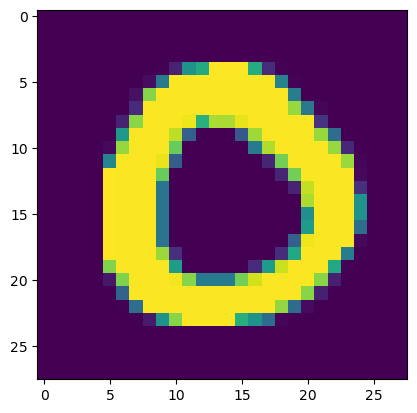

In [ ]:
plt.imshow(X[4][:,:,0])

In [ ]:
#one hor encoding for y "label"
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)
Y_val = to_categorical(Y_val, num_classes = 10)

In [ ]:
#check number of classes
Y_train.shape[1]

10

About LeNet_5

LeNet-5 is a convolutional neural network architecture designed by Yann LeCun et al. in 1998. It was one of the earliest and most influential deep learning models for image recognition and was widely used for handwritten digit recognition tasks.

LeNet-5v2 is an improved version of the original LeNet-5 architecture that was released in 2011. This updated version includes a number of modifications to the original architecture, such as increasing the number of filters in some layers, adding non-linearities after the convolutional layers, and introducing dropout regularization to prevent overfittin

In [ ]:


def LeNet5v2(input_shape=(32, 32, 1), classes=10):
    model = Sequential([
        Conv2D(filters=32, kernel_size=5, strides=1, activation="relu", input_shape=(32, 32, 1), kernel_regularizer=l2(0.0005)),
        Conv2D(filters=32, kernel_size=5, strides=1, use_bias=False),
        BatchNormalization(),
        Activation("relu"),
        MaxPooling2D(pool_size=2, strides=2),
        Dropout(0.25),
        Conv2D(filters=64, kernel_size=3, strides=1, activation="relu",input_shape=(32, 32, 1), kernel_regularizer=l2(0.0005)),
        Conv2D(filters=64, kernel_size=3, strides=1,input_shape=(32, 32, 1), use_bias=False),
        BatchNormalization(),
        Activation("relu"),
        MaxPooling2D(pool_size=2, strides=2),
        Dropout(0.25),
        Flatten(),
        Dense(units=256, use_bias=False),
        BatchNormalization(),
        Activation("relu"),
        Dense(units=128, use_bias=False),
        BatchNormalization(),
        Activation("relu"),
        Dense(units=84, use_bias=False),
        BatchNormalization(),
        Activation("relu"),
        Dropout(0.25),
        Dense(units=10, activation="softmax")
    ])
    model._name= 'LeNet5v2'
    return model



 

In [ ]:

LeNet5Model = LeNet5v2(input_shape = (32, 32, 1), classes = 10)

In [ ]:
LeNet5Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
LeNet5Model.summary()

Model: "LeNet5v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        25600     
                                                                 
 batch_normalization_5 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 32)        0  

**DATA Generation**

In [ ]:
data_gen = ImageDataGenerator(
        featurewise_center = False,  
        samplewise_center = False, 
        featurewise_std_normalization = False, 
        samplewise_std_normalization = False,  
        zca_whitening = False,  
        rotation_range = 10,  
        zoom_range = 0.1,  
        width_shift_range = 0.1,  
        height_shift_range = 0.1,  
        horizontal_flip = False,  
        vertical_flip = False)  

data_gen.fit(X_train)
     

loss_function

In [ ]:
learning_rate = ReduceLROnPlateau(monitor='val_loss', factor = 0.2, patience = 2)

In [ ]:
#history_model
history = LeNet5Model.fit(X_train, Y_train, epochs = 30, batch_size = 64, callbacks = [learning_rate], validation_data = (X_val,Y_val))

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.figure()

In [ ]:
#submission
results = LeNet5Model.predict(X_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")     
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("LeNetv2.csv",index=False)

875/875 [==============================] - 18s 21ms/step
